# **Specialised Machine Learning Techniques 2**

## **Power Of Imputers**

Imputers in Machine Learning are techniques used to handle missing data in datasets. Missing data is a common problem in real-world datasets, and imputers provide strategies to replace these missing values with appropriate estimates, so that machine learning models can operate without errors. Imputing missing data ensures that the dataset remains complete and that no valuable data points are lost due to missing values.

### Why Imputers Are Important:
- **Handling Missing Data**: Many machine learning algorithms cannot handle missing values directly and may give errors or produce suboptimal results if missing data is present.
- **Improves Model Accuracy**: By properly imputing missing values, the dataset becomes more complete and can lead to better model performance.
- **Retains Data**: Imputation allows you to keep as much data as possible instead of discarding rows or columns with missing values, which could reduce the amount of information available for learning.

### Types of Imputers

1. **Mean/Median/Mode Imputation**:
   - **Mean**: For continuous numerical features, missing values are replaced with the mean of the non-missing values.
   - **Median**: Replaces missing values with the median, often preferred when there are outliers.
   - **Mode**: Used for categorical features, replaces missing values with the most frequent category (the mode).

   Example (using `SimpleImputer` from scikit-learn):
   ```python
   from sklearn.impute import SimpleImputer
   import numpy as np
   import pandas as pd

   # Sample data with missing values
   data = {'Age': [25, np.nan, 35, 40, np.nan], 
           'Gender': ['Male', 'Female', 'Female', np.nan, 'Male']}
   df = pd.DataFrame(data)

   # Imputing missing numerical data with mean
   imputer = SimpleImputer(strategy='mean')
   df['Age'] = imputer.fit_transform(df[['Age']])

   # Imputing missing categorical data with mode
   imputer = SimpleImputer(strategy='most_frequent')
   df['Gender'] = imputer.fit_transform(df[['Gender']])

   print(df)
   ```

2. **K-Nearest Neighbors (KNN) Imputation**:
   - Uses the K-nearest neighbors algorithm to impute missing values based on the values of the K nearest observations.
   - For each missing value, KNN finds K similar instances (rows) based on other feature values and imputes the missing value by averaging (or mode in the case of categorical features) the non-missing values of the neighbors.

   Example:
   ```python
   from sklearn.impute import KNNImputer
   import pandas as pd

   # Sample data with missing values
   df = pd.DataFrame({
       'Feature1': [1, 2, np.nan, 4],
       'Feature2': [5, np.nan, np.nan, 8],
       'Feature3': [10, 11, 12, 13]
   })

   # Using KNNImputer
   imputer = KNNImputer(n_neighbors=2)
   df_imputed = imputer.fit_transform(df)

   print(df_imputed)
   ```

3. **Multivariate Imputation by Chained Equations (MICE)**:
   - Also called **Iterative Imputer**, this method models each feature with missing values as a function of the other features. It imputes values by drawing multiple imputation steps in a sequence (chained equations).
   - More advanced and can capture relationships between variables better than simpler methods like mean or mode imputation.

   Example:
   ```python
   from sklearn.experimental import enable_iterative_imputer
   from sklearn.impute import IterativeImputer
   import pandas as pd
   import numpy as np

   # Sample data with missing values
   df = pd.DataFrame({
       'Feature1': [1, 2, np.nan, 4],
       'Feature2': [5, np.nan, np.nan, 8],
       'Feature3': [10, 11, 12, 13]
   })

   # Using Iterative Imputer
   imputer = IterativeImputer()
   df_imputed = imputer.fit_transform(df)

   print(df_imputed)
   ```

4. **Constant Imputation**:
   - This method allows missing values to be filled with a constant value, often used when you want to replace missing values with a domain-specific constant.
   - For example, you can fill missing values with `0` for numerical data or `'Unknown'` for categorical data.

   Example:
   ```python
   imputer = SimpleImputer(strategy='constant', fill_value=0)
   df['Age'] = imputer.fit_transform(df[['Age']])
   ```

### Summary of Imputation Strategies:

| Method             | When to Use                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| **Mean**           | When the feature is continuous, and the data distribution is not skewed.     |
| **Median**         | When the feature is continuous, especially if the data contains outliers.    |
| **Mode**           | For categorical features.                                                   |
| **KNN Imputation** | When the missing data is correlated with other features and patterns can be learned. |
| **MICE**           | When the dataset is complex, and relationships between features are important to preserve. |
| **Constant Imputation** | When a specific value makes sense for your domain, e.g., 0 for missing numerical data or "Unknown" for missing categorical data. |

### Pros and Cons of Imputation

| Pros                                  | Cons                                                       |
|---------------------------------------|-------------------------------------------------------------|
| Retains valuable data                 | Can introduce bias (especially with simple methods like mean imputation) |
| Improves model performance            | KNN and MICE imputers are computationally expensive         |
| Prevents loss of data when values are missing | Can distort the data distribution                           |

### Best Practices
- Always evaluate the nature of your data and choose the imputation method carefully.
- Simple methods like mean and mode may work well for small datasets, but advanced methods like KNN or MICE may be better for larger datasets with complex patterns.


Import all the required packages

In [1]:
import pandas as pd
import numpy as np

Create a dummy data to understand the data imputation

In [2]:
data = {'age':[25, np.nan, 30, np.nan, 35],
        'salary': [50000, 60000, np.nan, 90000, np.nan]}

dataframe = pd.DataFrame(data)
dataframe

,age,salary
0,25.0,50000.0
1,NaN,60000.0
2,30.0,NaN
3,NaN,90000.0
4,35.0,NaN


Data Imputation via Mean, Median or Mode

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(dataframe)
imputed_df = pd.DataFrame(imputed_data, columns = dataframe.columns)
print(imputed_df)

    age        salary
0  25.0  50000.000000
1  30.0  60000.000000
2  30.0  66666.666667
3  30.0  90000.000000
4  35.0  66666.666667


Data Imputation via KNN Imputer

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(dataframe)
imputed_df = pd.DataFrame(imputed_data, columns = dataframe.columns)
print(imputed_df)

    age   salary
0  25.0  50000.0
1  27.5  60000.0
2  30.0  55000.0
3  27.5  90000.0
4  35.0  55000.0


---

## **Log normalization**

Log normalization is a technique used to transform skewed data into a more normalized distribution by applying the logarithm function. It is commonly used to handle data where the values span several orders of magnitude and are highly skewed, such as in financial data or datasets with exponential growth.

### Why Use Log Normalization?
- **Reduces Skewness**: Log normalization is particularly useful for datasets where values are heavily skewed, typically with a long tail of high values. By applying the logarithm function, large values are compressed, and the distribution becomes more symmetric or "normal."
- **Improves Model Performance**: Machine learning models often perform better when input data is normalized or has a more balanced distribution, especially algorithms that assume normally distributed data (like linear regression or k-nearest neighbors).
- **Makes Data Easier to Interpret**: Log-normalized data may reveal patterns or relationships that were previously hidden due to extreme values.

### Formula for Log Normalization

Log normalization applies the logarithmic function to each value in the dataset. For a value \( x \), the log-normalized value \( y \) is computed as:

```python
y = log(x)
```

Typically, a base of 10 or the natural logarithm (base \( e \)) is used. However, the log function cannot handle 0 or negative values, so it's common to add a small constant \( \epsilon \) to the values to avoid issues.

#### Adjusted Formula:
```python
y = log(x + \epsilon)
```
Where \( \epsilon \) is a small constant, often something like 1e-9, to ensure that all values are positive.

### Example of Log Normalization in Python

Let's see how log normalization works with a dataset:

```python
import numpy as np
import pandas as pd

# Example dataset with a large range of values
data = {'Value': [1, 10, 100, 1000, 10000, 100000]}
df = pd.DataFrame(data)

# Applying log normalization
df['LogNormalized'] = np.log(df['Value'] + 1e-9)  # Adding a small epsilon to avoid log(0)

print(df)
```

### Output:
```
     Value  LogNormalized
0        1       0.000000
1       10       2.302585
2      100       4.605170
3     1000       6.907755
4    10000       9.210340
5   100000      11.512925
```

Here, you can see that the original data has large differences between values, while the log-transformed data compresses these differences, making them more manageable.

### When to Use Log Normalization?

- **When the data is highly skewed**: If your data contains outliers or is heavily skewed with a few very large values and many small ones, log normalization can help.
- **When values are spread across several orders of magnitude**: In cases where the scale of your data spans large ranges (e.g., from 1 to 1,000,000), log normalization compresses this range.
- **When you're using models that assume normality**: Models like linear regression perform better with normally distributed data, and log normalization can help transform skewed data into a more normal distribution.

### Pros and Cons

| Pros                                  | Cons                                                      |
|---------------------------------------|------------------------------------------------------------|
| Reduces the effect of large values    | Cannot handle zero or negative values without adjustment    |
| Helps normalize skewed distributions  | Interpretation of log-transformed data may not be straightforward |
| Makes patterns easier to see          | May not be suitable for data with values near zero          |

### Summary:
Log normalization is an effective technique to handle data with large ranges or skewed distributions. By applying the logarithmic transformation, large values are compressed, and the dataset becomes more manageable for machine learning models. However, it requires careful handling of zero and negative values to avoid computation errors.

## **Log Transformation for Positive or Right Skewed Data**

In [1]:
# Import pandas library 
import pandas as pd
import numpy as np
import seaborn as sns

# create a list of data 
data = [1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
# df 

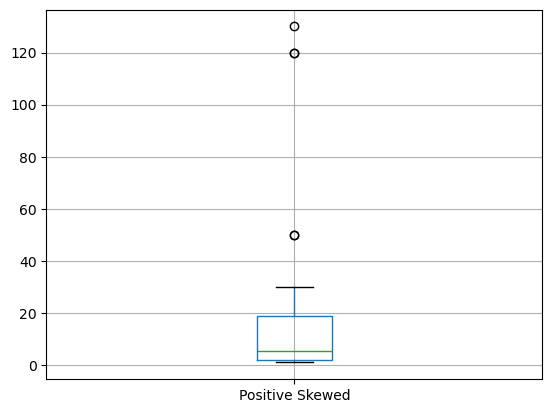

In [2]:
#Boxplot showing three outliers
from matplotlib import pyplot as plt
df.boxplot(column='Positive Skewed')
plt.show()

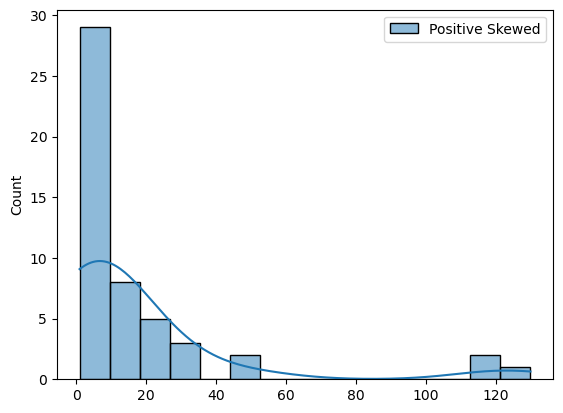

In [3]:
sns.histplot(df, kde=True)
plt.show()

In [4]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 1 to 130
inp_array = df 
# print ("Input array : ", inp_array)

In [5]:
#Applying log10 transformation with output values ranging from 0 to 2+
out_array = np.log10(inp_array) 
# print ("Output array : ", out_array)

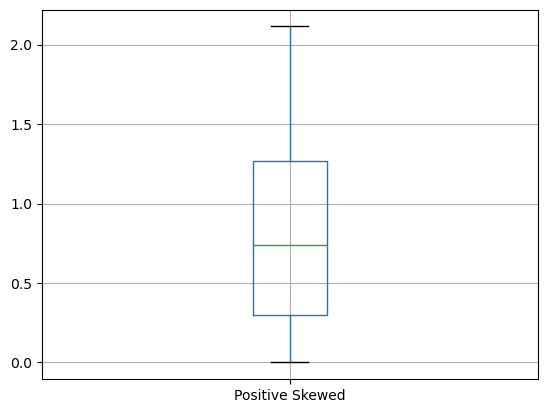

In [6]:
#Boxplot showing No outliers with all of them treated by doing log10 transformation.
out_array.boxplot(column='Positive Skewed')
plt.show()

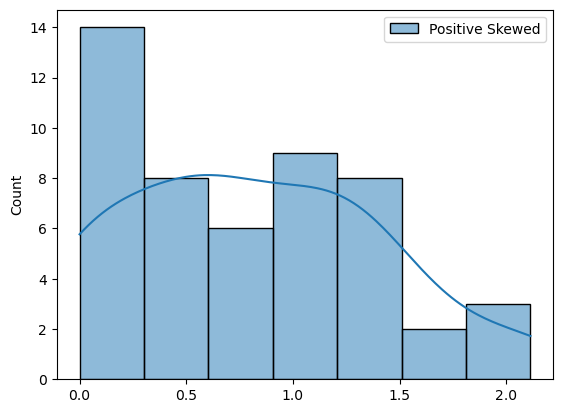

In [7]:
sns.histplot(out_array, kde=True)
plt.show()

In [8]:
#If wants to revert back log10 values to original value for interpretation purpose then just raise 10 to the power 
#log10 values as shown below.
original_val = (10**out_array) 
# print ("Original Values : ", original_val)

# Square Root Transformation for Positive or Right Skewed Data

In [9]:
# Import pandas library 
import pandas as pd
import numpy as np
import seaborn as sns

# Create a list of data. Here, we have included zeros as well in the data
data = [0,0,1,1,10,10,15,15,20,20,30,50,120,130,120,50,30,30,25,20,20,15,15,13,11,9,7,6,6,5,5,5,4,4,4,4,3,3,3,3,2,2,2,2,2,1,1,1,1,1,1,
1,0,0] 
  
# Create the pandas DataFrame 
df2 = pd.DataFrame(data, columns = ['Positive Skewed']) 
  
# print dataframe. 
# df2 

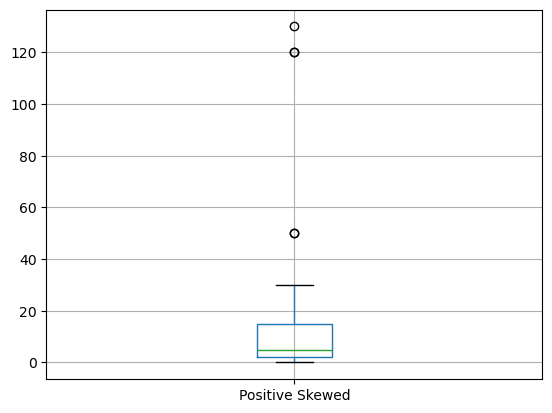

In [10]:
#Boxplot showing three outliers
df2.boxplot(column='Positive Skewed')
plt.show()

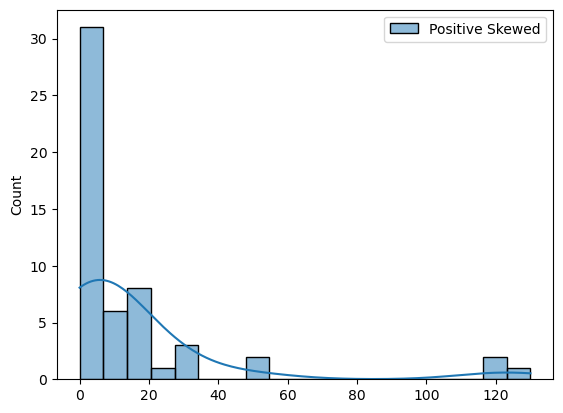

In [11]:
sns.histplot(df2, kde=True, )
plt.show()

In [12]:
#Creating input data from dataframe df on variable Positive Skewness with input values ranging from 0 to 130
inp_array2 = df2 
# print ("Input array : ", inp_array2)

In [13]:
#Applying Square Root transformation with output values ranging from 0 to 11+
out_array2 = np.sqrt(inp_array2) 
# print ("Output array : ", out_array2)

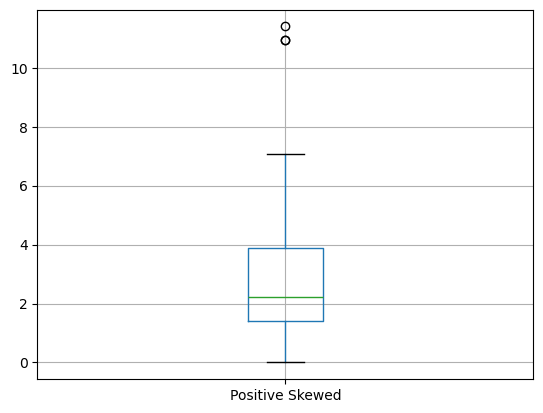

In [14]:
#Boxplot showing only Two outliers now, with one of those treated by doing Square Root transformation.
out_array2.boxplot(column='Positive Skewed')
plt.show()

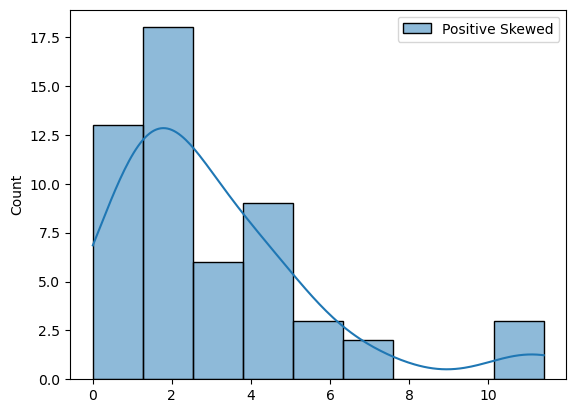

In [15]:
sns.histplot(out_array2, kde=True)
plt.show()

---

## **Model Selection and Comparison**

**Model selection and comparison** are critical steps in the machine learning process that help you choose the best model for a given dataset and problem. These steps involve selecting models, comparing their performance, and tuning them to optimize accuracy, generalization, and other evaluation metrics. Here’s an in-depth explanation of the concepts:

### 1. **Why Model Selection is Important?**

Model selection is important because different algorithms may perform better depending on the nature of the data and the problem at hand. No one algorithm works best for all problems (this is referred to as the "no free lunch" theorem). Some models may generalize better, handle outliers, or deal with missing data differently. Therefore, selecting the right model is key to building a successful machine learning solution.

### 2. **Steps in Model Selection:**

- **Step 1: Define the Problem**: 
  First, identify whether it's a classification, regression, clustering, or another type of problem.
  
- **Step 2: Preprocess the Data**: 
  Clean the dataset, handle missing values, encode categorical variables, and normalize the data if required. This step ensures that your models receive clean, consistent input data.

- **Step 3: Choose a Range of Models**:
  Based on the problem type and data, select a range of models that you want to test. For example, for a classification problem, you may want to try:
  - Logistic Regression
  - Decision Trees
  - Random Forest
  - k-Nearest Neighbors (k-NN)
  - Support Vector Machines (SVM)
  - Gradient Boosting methods (like XGBoost)
  
- **Step 4: Use Cross-Validation for Evaluation**:
  Split your data into training and test sets. A common technique for model selection is **k-fold cross-validation**, where the data is split into `k` subsets, and the model is trained on `k-1` subsets and tested on the remaining one. This is repeated `k` times, and the average performance across all folds is used to compare models.
  
- **Step 5: Evaluate Models Using Performance Metrics**:
  Use relevant performance metrics for comparison:
  - For classification: Accuracy, Precision, Recall, F1-score, ROC-AUC
  - For regression: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared
  
- **Step 6: Compare Models**:
  Based on cross-validation results and performance metrics, compare how different models perform. Select the model that best balances generalization (performance on unseen data) and overfitting (complexity of the model).

- **Step 7: Hyperparameter Tuning**:
  Once the best-performing model is identified, optimize its hyperparameters using techniques like **GridSearchCV** or **RandomizedSearchCV** to further enhance its performance.

### 3. **Key Metrics for Model Comparison**

- **Accuracy**: The proportion of correctly classified instances.
  
- **Precision and Recall**: These are important metrics when dealing with imbalanced datasets.
  - **Precision**: The proportion of true positives among all predicted positives.
  - **Recall**: The proportion of true positives out of all actual positives.

- **F1-Score**: Harmonic mean of Precision and Recall, especially useful when the dataset is imbalanced.

- **ROC-AUC**: Measures how well the model separates positive and negative classes by plotting the true positive rate (TPR) against the false positive rate (FPR).

- **MSE and RMSE**: Mean Squared Error and Root Mean Squared Error for regression tasks to measure the average squared difference between actual and predicted values.

- **R-squared**: A statistical measure of how well the model’s predictions approximate the actual data points.

### 4. **Overfitting and Underfitting:**
- **Overfitting**: A model is too complex (like a deep decision tree) and performs very well on the training data but poorly on new, unseen data. 
- **Underfitting**: A model is too simple (like linear regression on non-linear data) and fails to capture the patterns in the training data.

The goal of model selection is to find a balance where the model is neither underfitting nor overfitting.

### 5. **Example: Model Selection Using Cross-Validation**

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression()
}

# Perform 5-fold cross-validation and compare models
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} Accuracy: {scores.mean():.3f}")
```

### 6. **Model Comparison**

Once cross-validation is done, the model with the highest cross-validated accuracy can be selected, but this also depends on other metrics (e.g., precision, recall) and business requirements.

### 7. **Model Tuning**

Once the best model is selected, hyperparameter tuning can be performed. For instance, for RandomForest:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
```

### 8. **Final Comparison and Model Selection**

After tuning, compare the final model's performance on the test set. For example, calculate accuracy, precision, recall, and AUC scores for the chosen model, and make your final selection.

### Summary of Model Selection:

- **Cross-validation** helps ensure that the model generalizes well.
- **Multiple metrics** should be used for model comparison.
- **Hyperparameter tuning** refines the selected model's performance.
- **Business context** and interpretability of the model should also be considered when selecting the final model.

This process ensures that the chosen model is the best suited for your problem, balances performance with simplicity, and generalizes well to new, unseen data.

Import all the required frameworks

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Load the data: Breast Cancer Dataset[classification problem]

In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() #loading the data
# print(data)

Data Split: Splitting of a give data into input features and target variable


In [18]:
X = data.data
y = data.target
# print(X)
# print(y)

Data Splitting into train set and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data Modeling

In [20]:
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True)
}


# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained successfully.')

Random Forest trained successfully.
KNN trained successfully.
Logistic Regression trained successfully.
SVM trained successfully.


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Evaluate models
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.964912   0.984615  0.955224  0.969697  0.995395
KNN                  0.956140   0.930556  1.000000  0.964029  0.982375
Logistic Regression  0.964912   0.970149  0.970149  0.970149  0.993331
SVM                  0.982456   0.971014  1.000000  0.985294  0.999047


In [22]:
# Compare models
print('Model Comparison:')
print(results_df)

Model Comparison:
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.964912   0.984615  0.955224  0.969697  0.995395
KNN                  0.956140   0.930556  1.000000  0.964029  0.982375
Logistic Regression  0.964912   0.970149  0.970149  0.970149  0.993331
SVM                  0.982456   0.971014  1.000000  0.985294  0.999047
